In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [3]:
g_cred = pd.read_csv('german_credit_data.csv')
g_cred.shape
g_cred.size
g_cred.describe().T
g_cred.columns
g_cred.dtypes

(1000, 10)

10000

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [4]:
g_cred.head(2)
g_cred.info()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
a = pd.read_csv('german_credit.csv')

In [6]:
a = a.loc[:,['default']]

In [7]:
g_cred['status'] = a[:]


In [8]:
g_cred.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'status'],
      dtype='object')

In [9]:
g_cred = g_cred.drop(columns='Unnamed: 0', axis =1)

In [10]:
g_cred.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
status                0
dtype: int64

In [11]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [12]:
from sklearn.model_selection import train_test_split
from random import sample

In [13]:
g_cred1 = g_cred.sample(n = 500)
g_cred1.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,status
9,28,male,3,own,little,moderate,5234,30,car,1
451,29,female,2,own,little,NaN,518,6,radio/TV,0
311,25,male,2,own,moderate,NaN,5511,24,furniture/equipment,0
109,35,male,2,own,quite rich,moderate,1410,14,business,0
988,29,male,3,free,little,little,6579,24,car,0


In [14]:
g_cred2 = g_cred[~ g_cred.index.isin(g_cred1.index)]

In [15]:
g_cred2.shape

(500, 10)

In [16]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [17]:
g_cred.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,status
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [18]:
g_cred.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
status               int64
dtype: object

In [19]:
g_cred_dummy = pd.get_dummies(g_cred,columns=['Sex','Housing','Saving accounts','Checking account','Purpose'])

In [20]:
g_cred_dummy.head()

,Age,Job,Credit amount,Duration,status,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
g_cred_dummy.head().T

,0,1,2,3,4
Age,67,22,49,45,53
Job,2,2,1,2,2
Credit amount,1169,5951,2096,7882,4870
Duration,6,48,12,42,24
status,0,1,0,0,1
Sex_female,0,1,0,0,0
Sex_male,1,0,1,1,1
Housing_free,0,0,0,1,1
Housing_own,1,1,1,0,0
Housing_rent,0,0,0,0,0


In [22]:
# Print Shape of model data

In [23]:
g_cred1.shape

(500, 10)

### Check for highly correlated variables but don't required any treatment for this use case

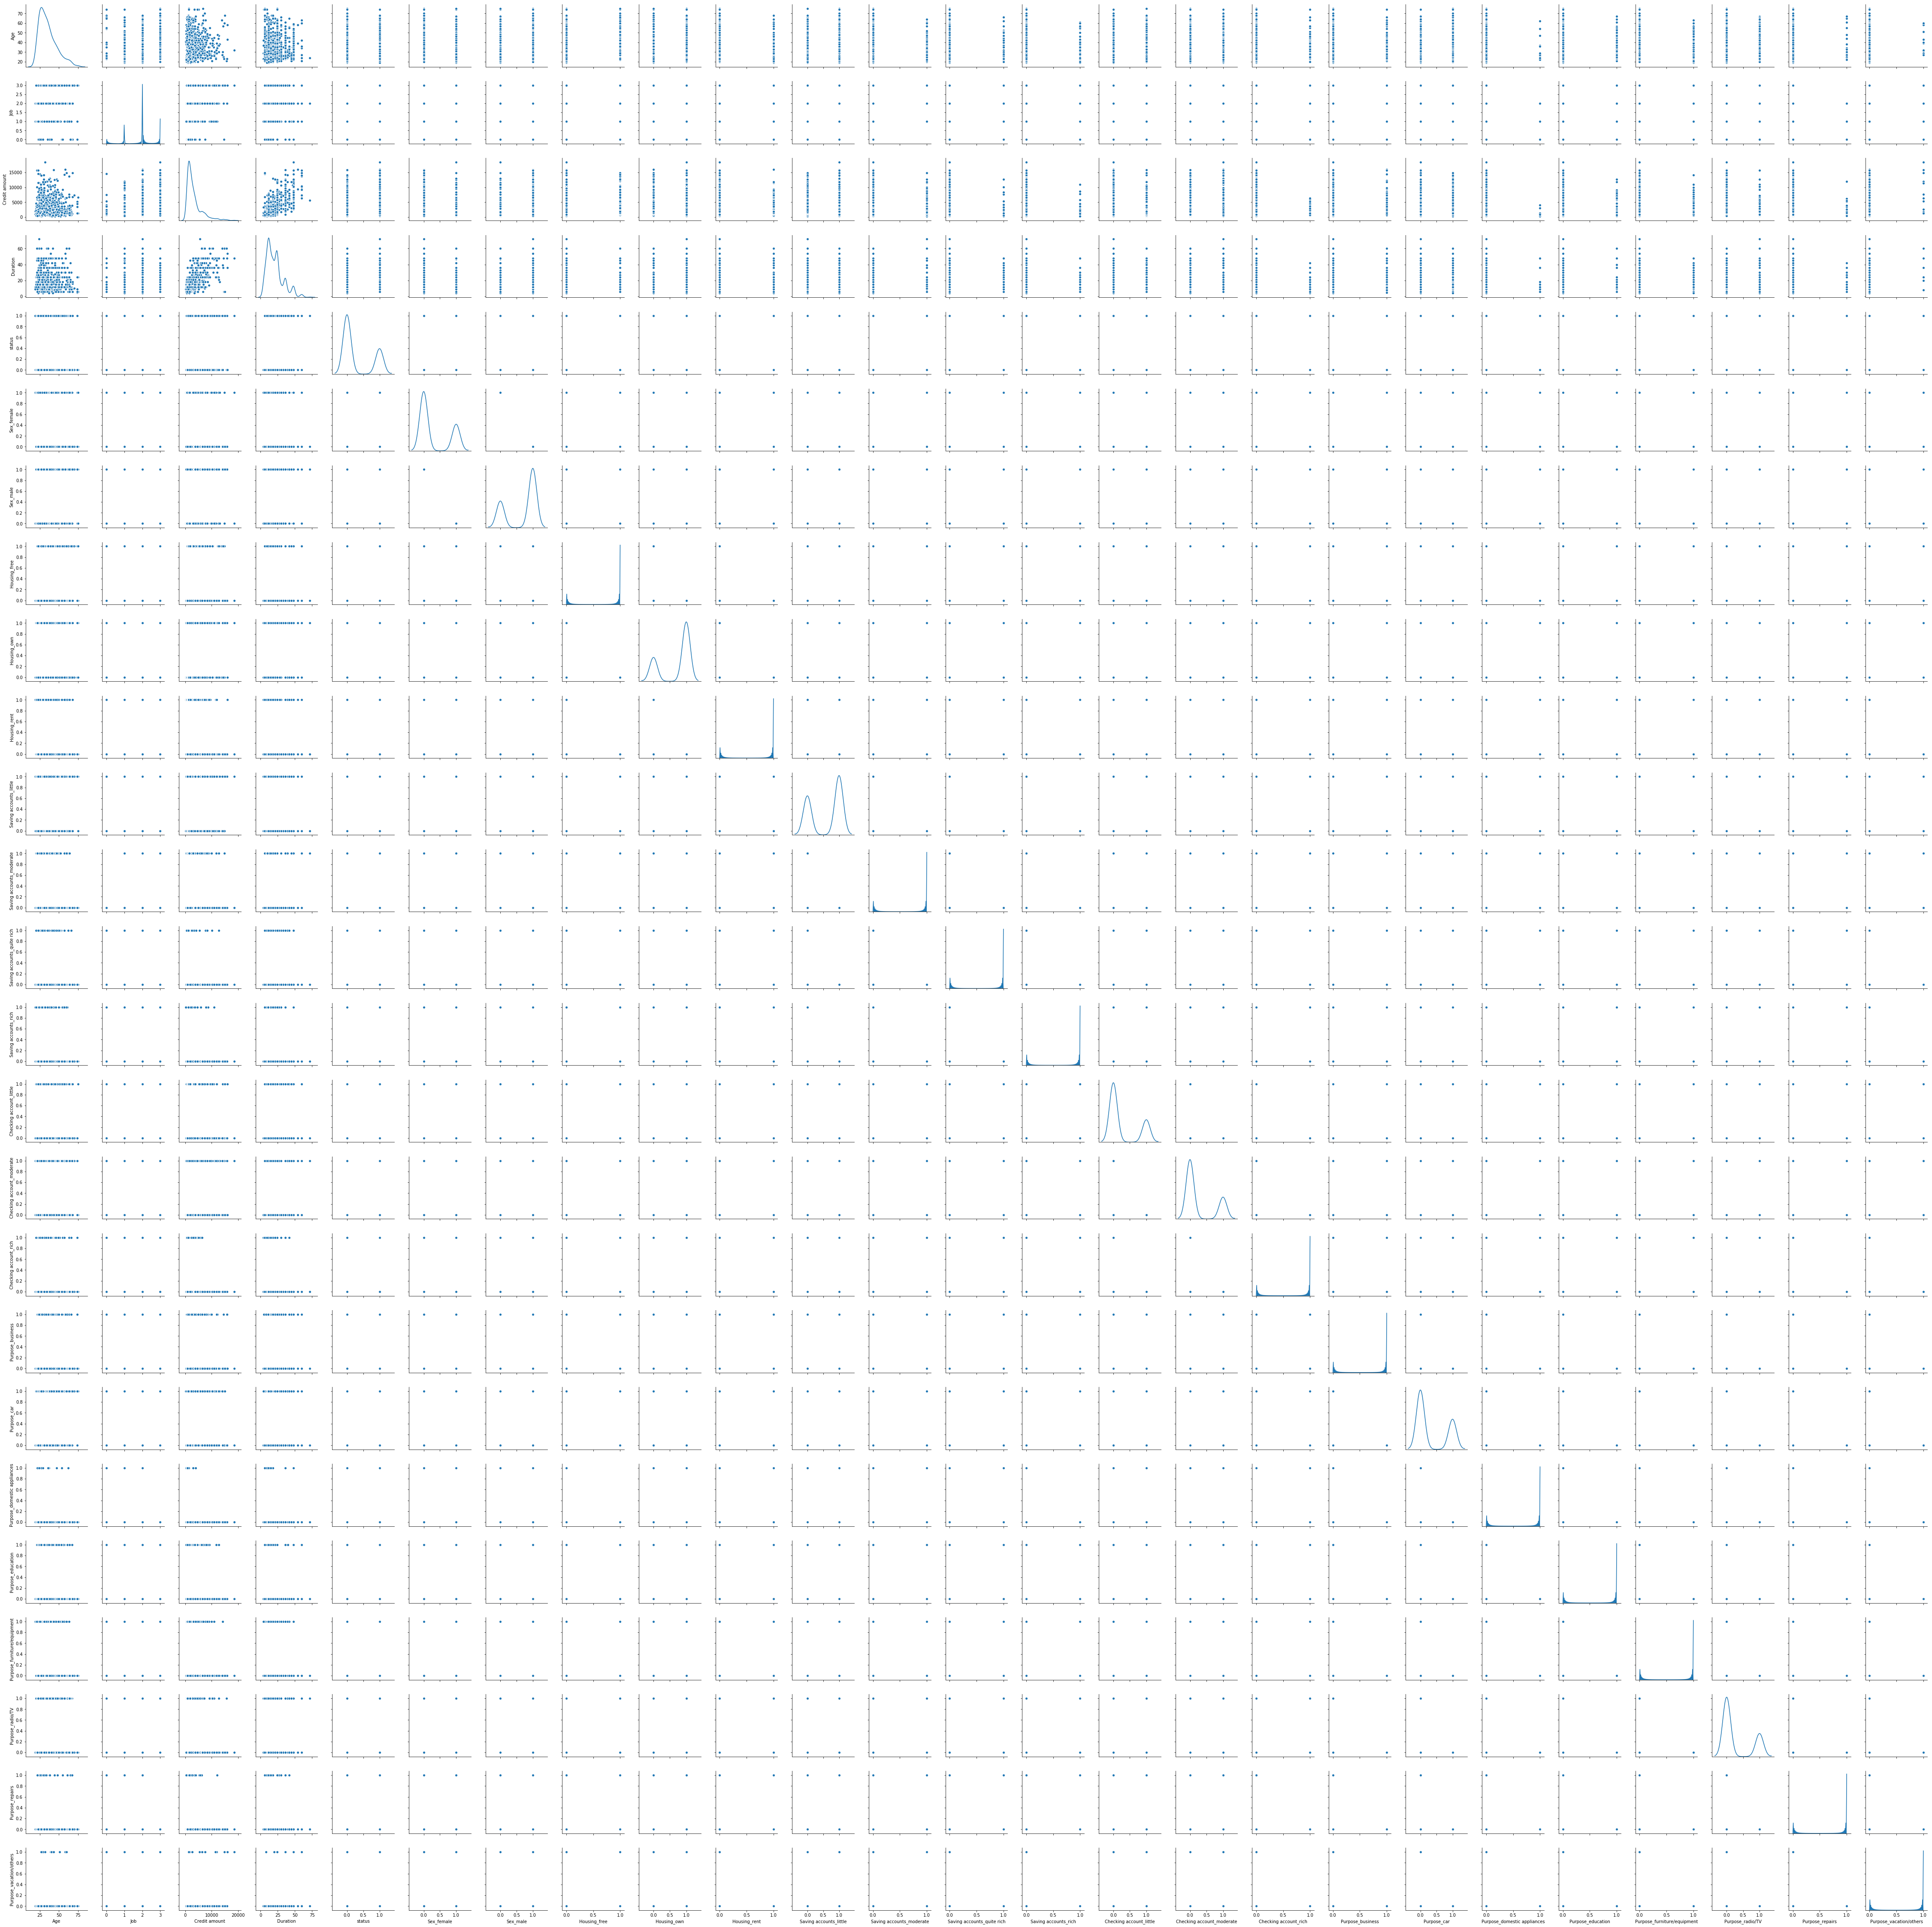

In [24]:
sns.pairplot(g_cred_dummy,diag_kind='kde')

<Figure size 1440x1440 with 0 Axes>

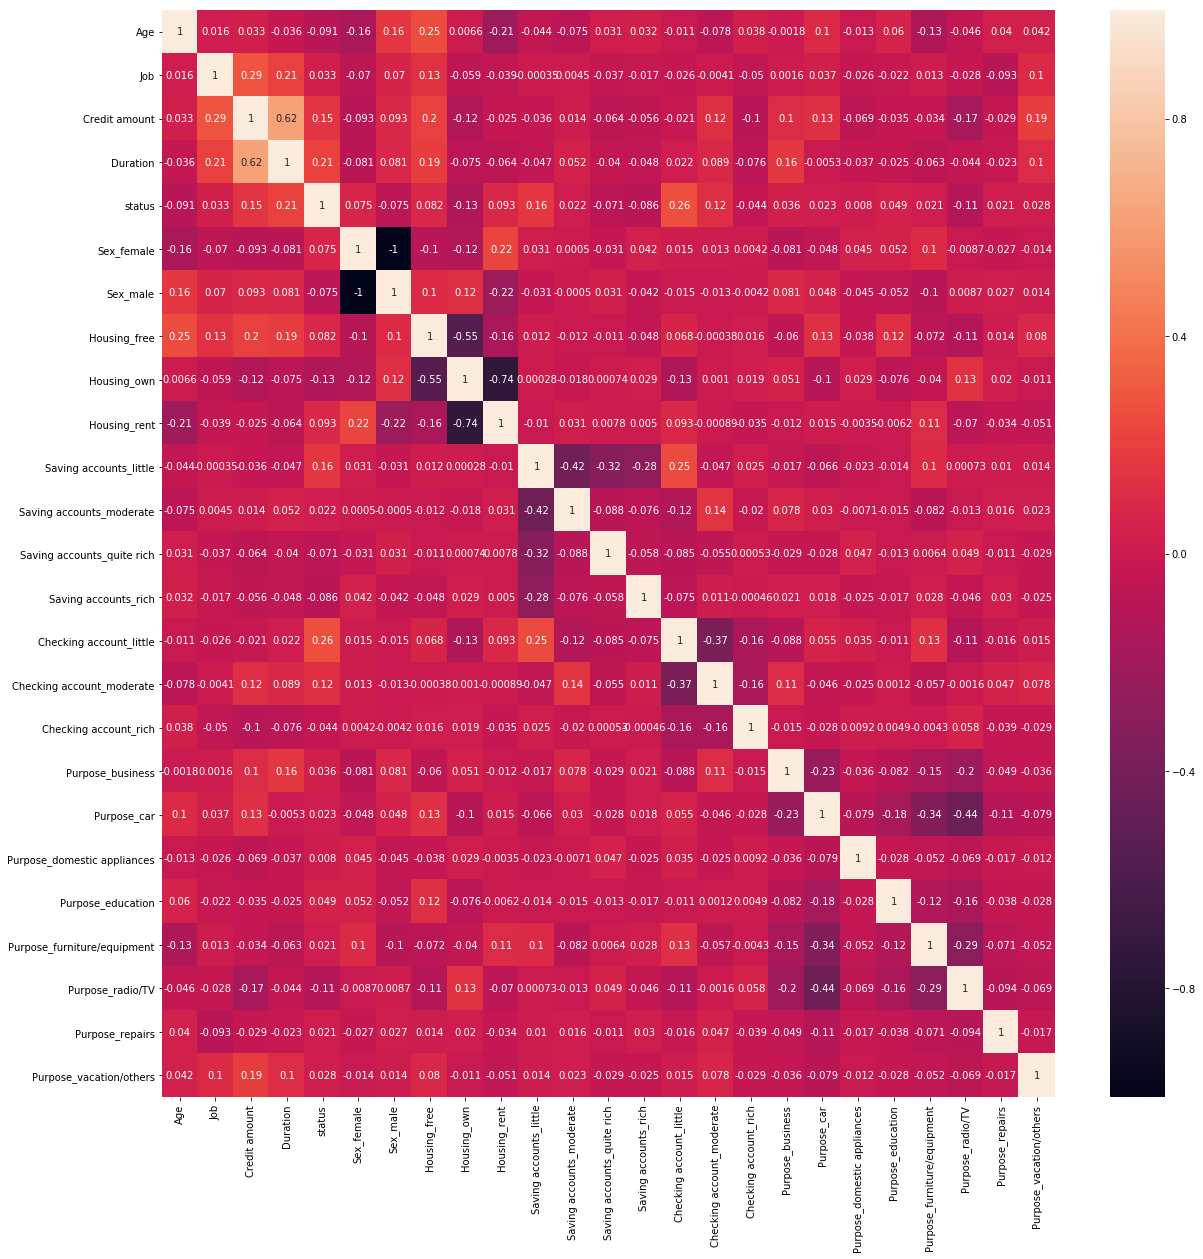

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(g_cred_dummy.corr(),annot = True,)
plt.show()

### Drop the original variables which are converted to dummy

In [26]:
g_cred.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'status'],
      dtype='object')

In [27]:
g_cred_dummy.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'status', 'Sex_female',
       'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [28]:
x = g_cred_dummy.drop(columns='status',axis =1)
y = g_cred_dummy.loc[:,['status']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = .70)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [31]:
from sklearn.ensemble import RandomForestClassifier 

In [32]:
model_RF = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999)

In [33]:
model_RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [35]:
print ("Confusion Matrix \n",confusion_matrix(model_RF.predict(x_test),y_test))

Confusion Matrix 
 [[189  56]
 [ 22  33]]


In [36]:
print ("accuracy score =",accuracy_score(model_RF.predict(x_test),y_test))

accuracy score = 0.74


### Q6 Show the list of the features importance( 1 Marks)

In [37]:
importance  = model_RF.feature_importances_
print (importance)

[0.17874111 0.05847089 0.22420157 0.15400819 0.01938241 0.01922791
 0.01397601 0.01973464 0.01751573 0.03516521 0.01844926 0.01149169
 0.01128474 0.05545555 0.0357987  0.01321502 0.01880995 0.02578399
 0.00429616 0.01237596 0.0200186  0.02364364 0.0060242  0.00292888]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
# Use below values
num_folds = 10
seed = 77

In [40]:
#Validate the Random Forest model build above using k fold

In [41]:
Kfold = KFold(n_splits=num_folds,random_state=seed)

In [42]:
result = cross_val_score(model_RF,x_train,y_train,cv=Kfold)

In [43]:
#Calculate Mean score

In [44]:
print(result.mean())

0.7257142857142856


In [45]:
# Calculate score standard deviation using std()

In [46]:
result.std()

0.05022398808927699

# Q8 Print the confusion matrix( 1 Marks)

In [47]:
print (confusion_matrix(y_test,model_RF.predict(x_test)))

[[189  22]
 [ 56  33]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print (classification_report(y_test,model_RF.predict(x_test)))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83       211
          1       0.60      0.37      0.46        89

avg / total       0.72      0.74      0.72       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [50]:
#Hint: Use roc_curve

In [51]:
from sklearn.metrics import roc_curve

In [52]:
y_proba = model_RF.predict_proba(x_test)[:,1]

In [53]:
fpr ,tpr,thresholds = roc_curve(y_test,model_RF.predict(x_test))

In [54]:
print ('fpr = ',fpr,'tpr = ',tpr )

fpr =  [0.        0.1042654 1.       ] tpr =  [0.         0.37078652 1.        ]


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

Text(0.5,0,'False +ve Rate')

Text(0,0.5,'True +ve Rate')

Text(0.5,1,'ROC curve')

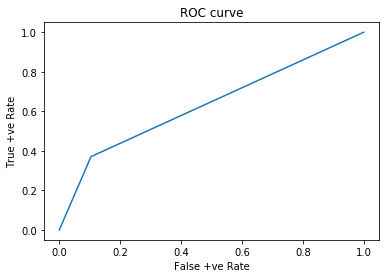

In [55]:
plt.plot(fpr,tpr)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC curve')
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [56]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [57]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [60]:
bootstrap_iteration1 = list(range(0,10))
bootstrap_iteration2 = list(range(0,10))
accuracy = []
acc1 = []

for i in bootstrap_iteration1:
    boost =AdaBoostClassifier(base_estimator=model_RF,n_estimators=50)
    boost.fit(x_train,y_train)
    acc = accuracy_score(y_test,boost.predict(x_test))
    accuracy.append(acc)        
print (accuracy)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

[0.7433333333333333, 0.74, 0.7433333333333333, 0.7366666666666667, 0.7433333333333333, 0.7333333333333333, 0.7466666666666667, 0.7366666666666667, 0.7566666666666667, 0.7466666666666667]


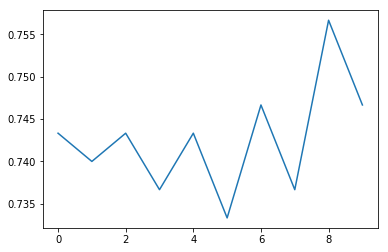

In [62]:
plt.plot(accuracy)